# Lab 08 - wykrywanie początków dźwięku (Onset)

Karol Działowski

Wyznacz onsety poszczególnych dźwięków dla wszystkich plików źródłowych. Skorzystaj z
metody polegającej na wyznaczeniu obwiedni sygnału w dziedzinie czasu opierając się na
uśrednionej energii sygnału dla zadanej liczby próbek (parametr zadania). Wyznacz obwiednie dla
różnych wartości parametru. Zbadaj przydatność obwiedni do wyznaczania onsetów dla różnych
wartości parametru (np. 3 różne wartości).

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.io import wavfile
from scipy import signal

import warnings
warnings.filterwarnings('ignore')

## Rhythm_1.wav

In [8]:
y, sr = librosa.load("./data/Rhythm_1.wav", mono=True)

In [9]:
sr

22050

In [10]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

Wyznaczanie obwiedni do wykrywania onsetów jako średnia krocząca z kwadratu amplitudy sygnału.

In [11]:
n_samples_0 = 1000
n_samples_1 = int(n_samples_0 + 0.2*n_samples_0)
n_samples_2 = int(n_samples_0 - 0.2*n_samples_0)
envelope_0 = moving_average(y**2, n_samples_0)
envelope_1 = moving_average(y**2, n_samples_1)
envelope_2 = moving_average(y**2, n_samples_2)

Detekcja peaków za pomocą funkcji `find_peaks`. Ograniczenie minimalnej wysokości jako dwukrotność średniej wyznaczonej obwiedni.

In [12]:
from scipy.signal import find_peaks

peaks_0, _ = find_peaks(envelope_0, distance=1000, height=np.mean(envelope_0)*2)
peaks_1, _ = find_peaks(envelope_0, distance=1000, height=np.mean(envelope_1)*2)
peaks_2, _ = find_peaks(envelope_0, distance=1000, height=np.mean(envelope_2)*2)

Text(0.5, 1.0, '800')

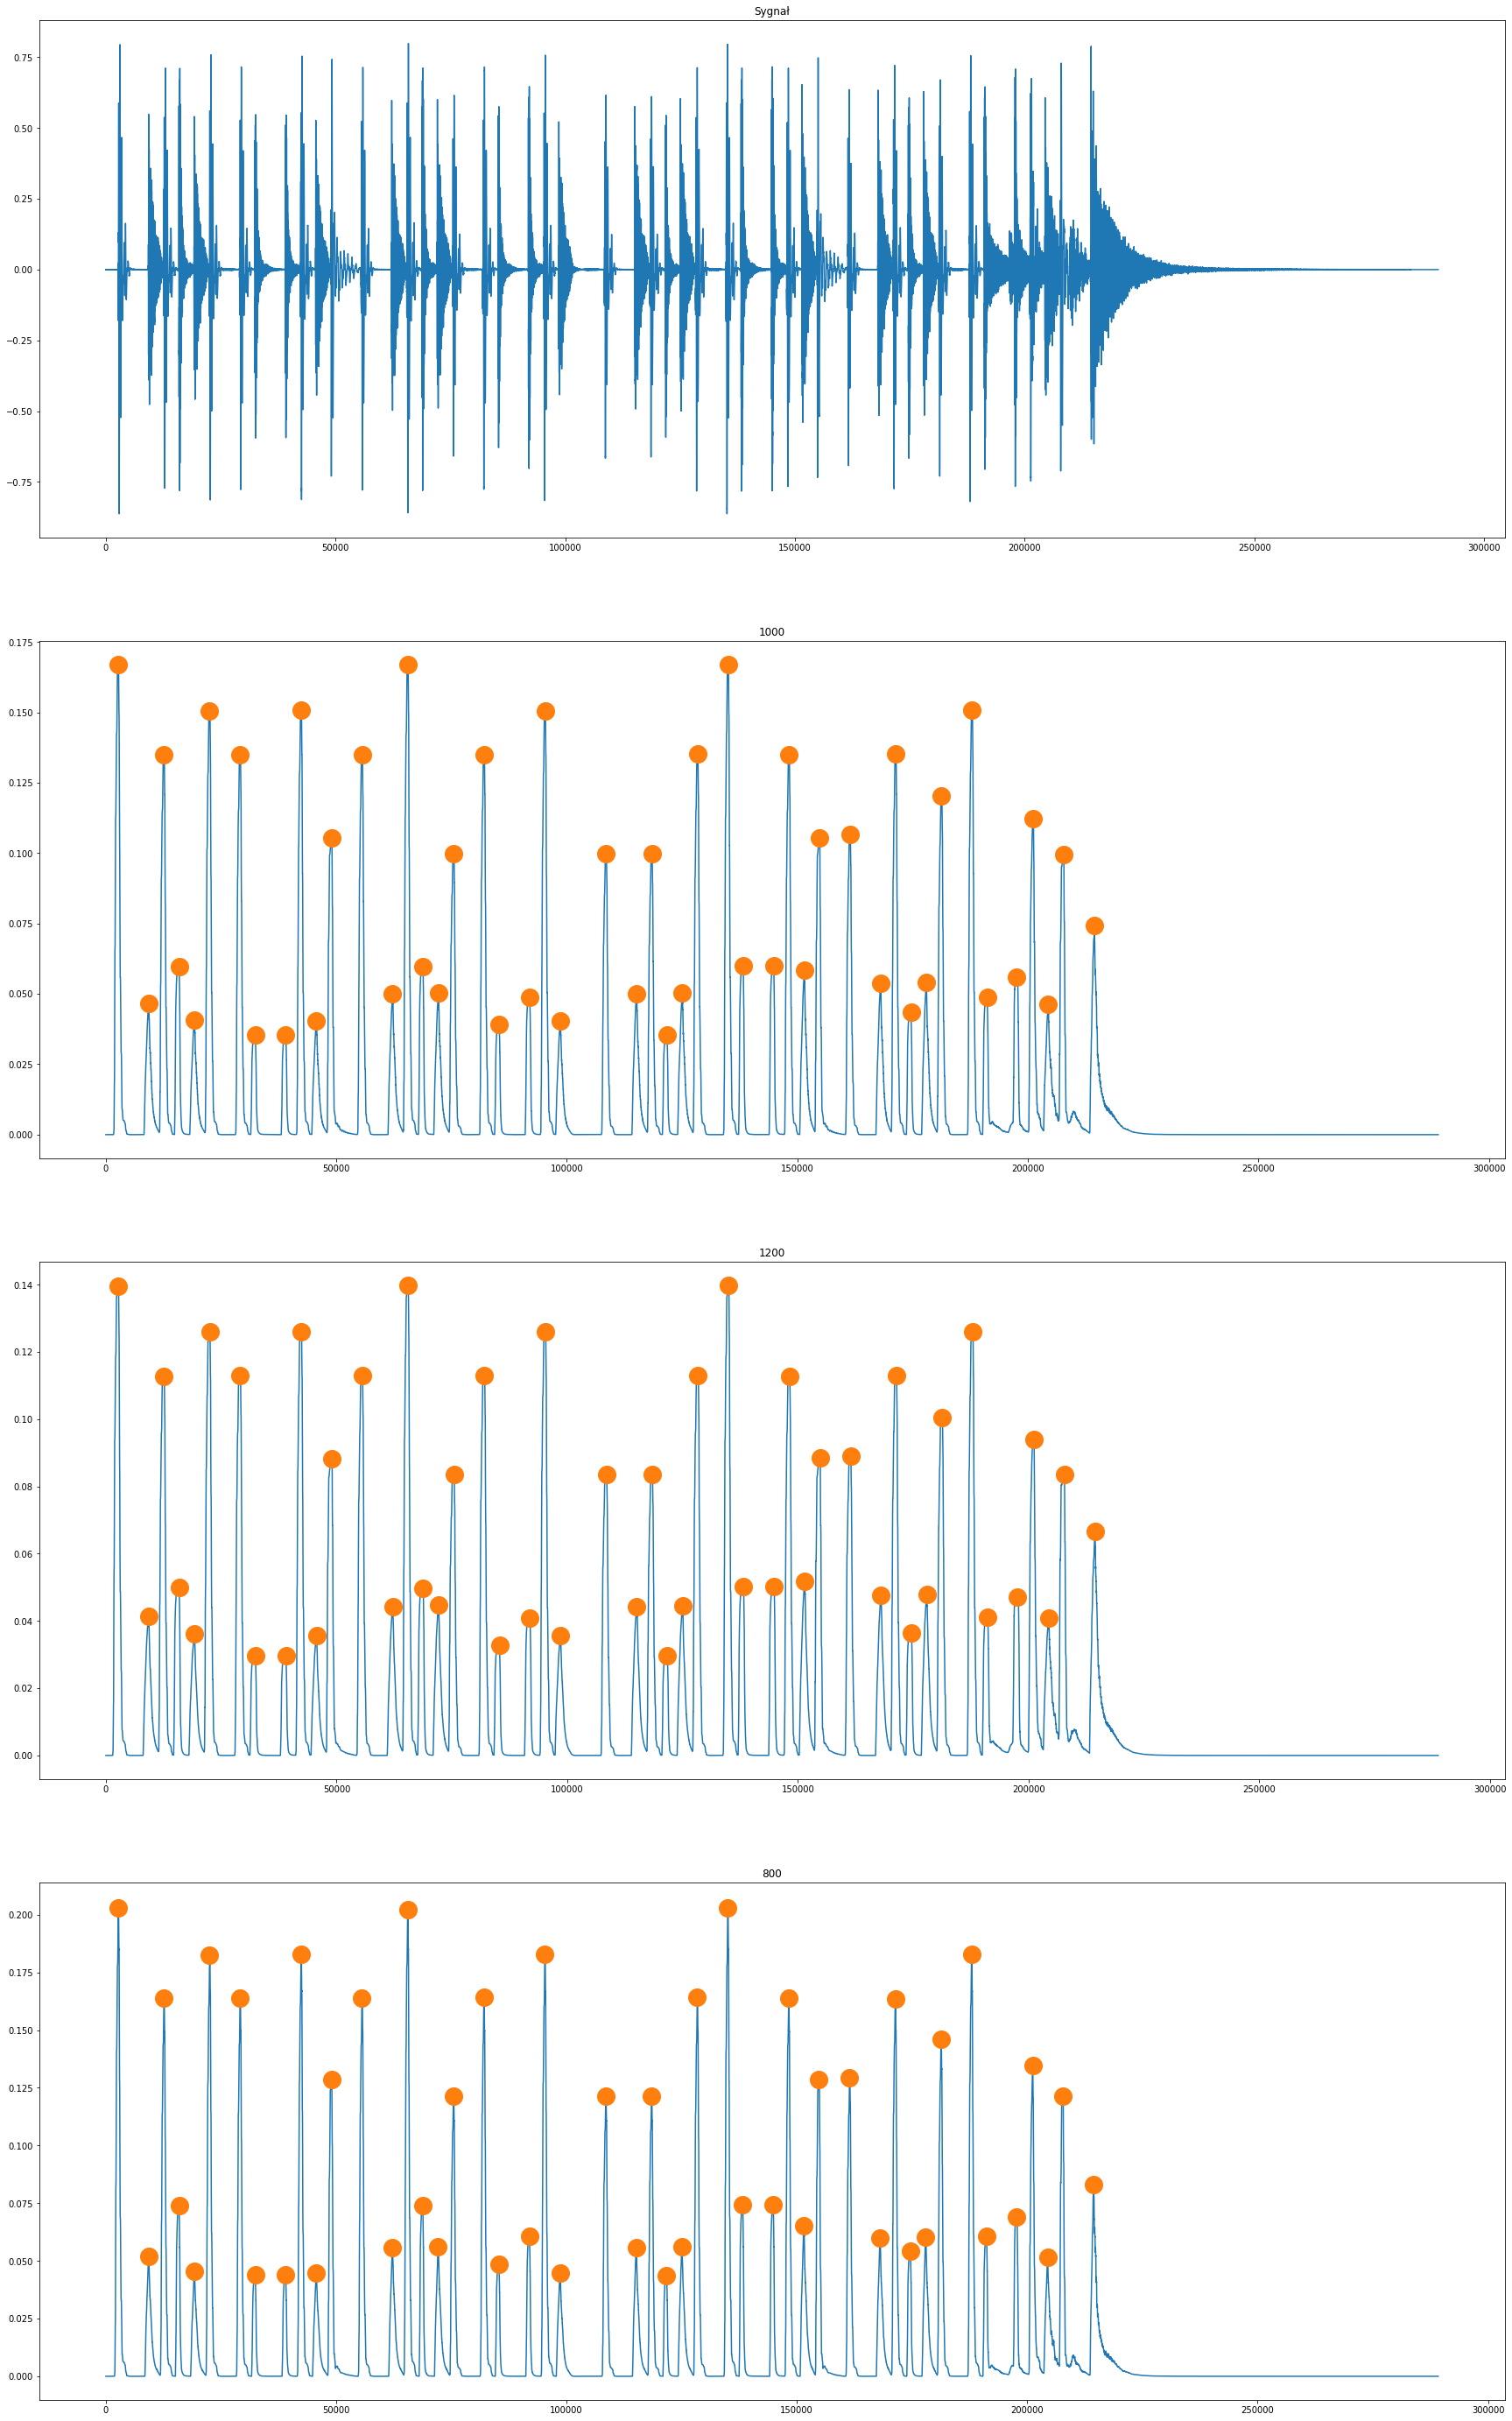

In [13]:
fig, axes = plt.subplots(4, 1, figsize=(30, 50))
axes[0].plot(y)
axes[0].set_title("Sygnał")
axes[1].plot(envelope_0)
axes[1].plot(peaks_0, envelope_0[peaks_0], "o", markersize=20)
axes[1].set_title(n_samples_0)
axes[2].plot(envelope_1)
axes[2].plot(peaks_1, envelope_1[peaks_1], "o", markersize=20)
axes[2].set_title(n_samples_1)
axes[3].plot(envelope_2)
axes[3].plot(peaks_2, envelope_2[peaks_2], "o", markersize=20)
axes[3].set_title(n_samples_2)

## Rhythm_2 

In [14]:
y, sr = librosa.load("./data/Rhythm_2.wav", mono=True)

Text(0.5, 1.0, '800')

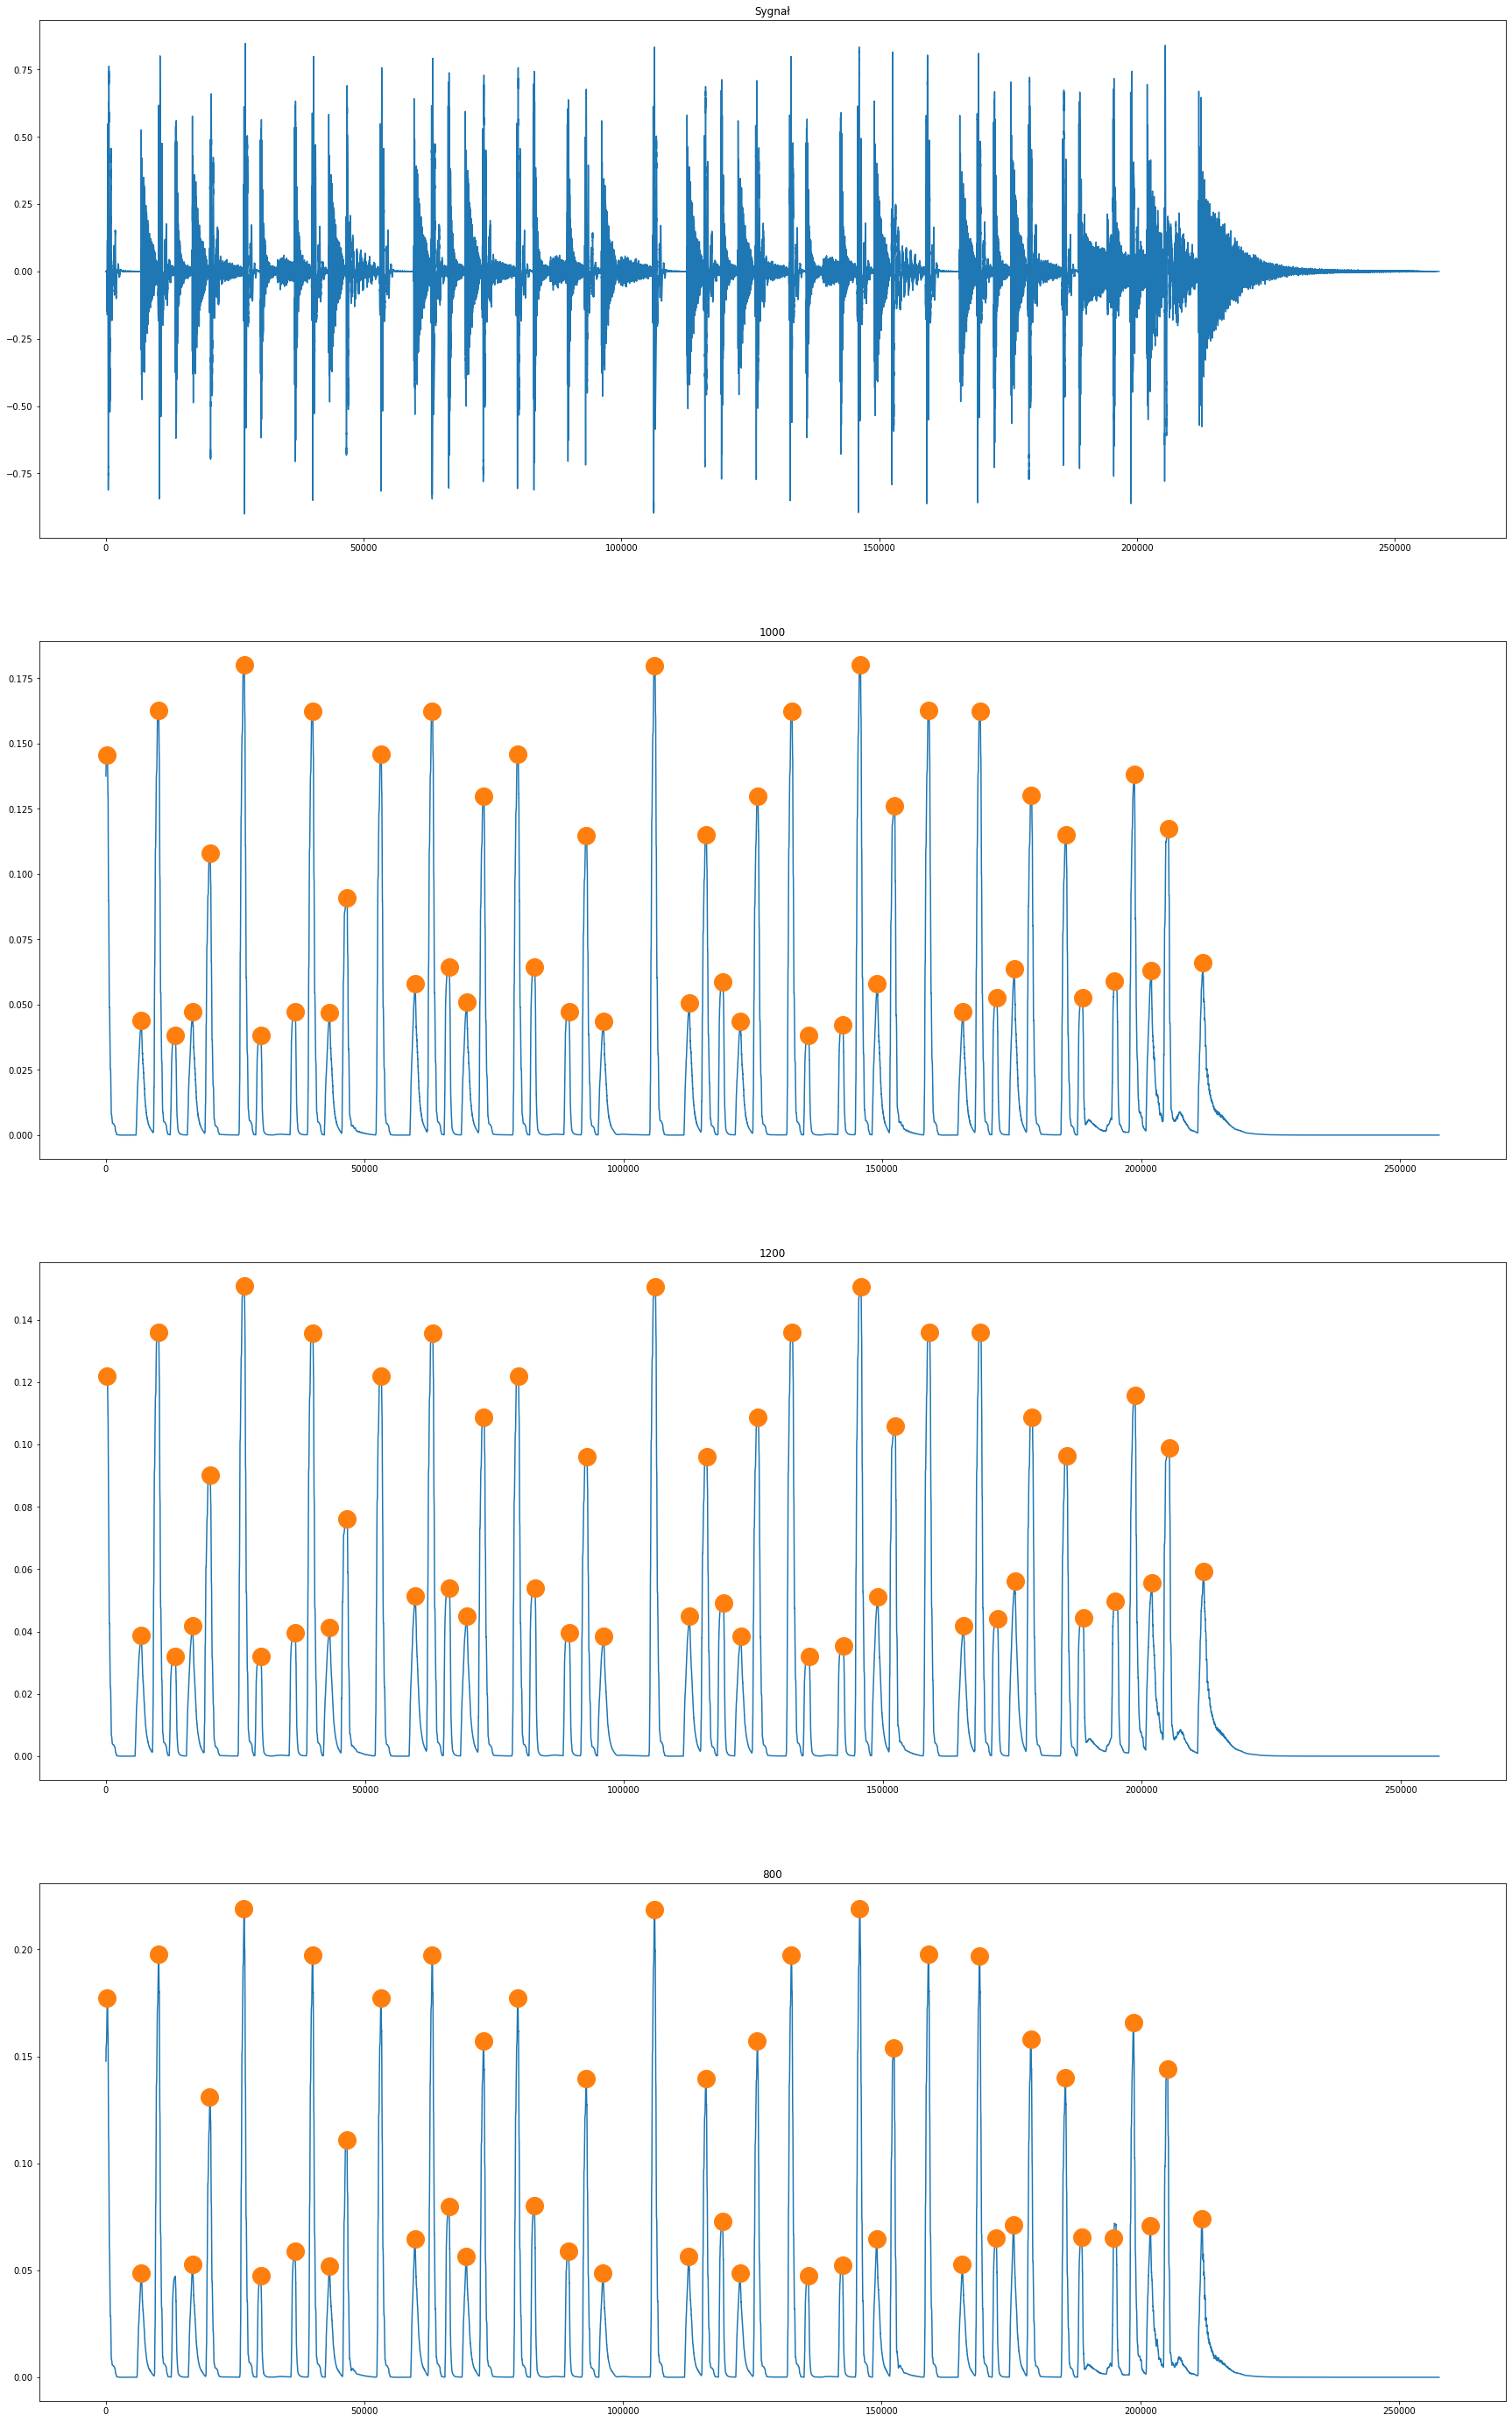

In [15]:
n_samples_0 = 1000
n_samples_1 = int(n_samples_0 + 0.2*n_samples_0)
n_samples_2 = int(n_samples_0 - 0.2*n_samples_0)
envelope_0 = moving_average(y**2, n_samples_0)
envelope_1 = moving_average(y**2, n_samples_1)
envelope_2 = moving_average(y**2, n_samples_2)


peaks_0, _ = find_peaks(envelope_0, distance=1000, height=np.mean(envelope_0)*2)
peaks_1, _ = find_peaks(envelope_0, distance=1000, height=np.mean(envelope_1)*2)
peaks_2, _ = find_peaks(envelope_0, distance=1000, height=np.mean(envelope_2)*2)

fig, axes = plt.subplots(4, 1, figsize=(30, 50))
axes[0].plot(y)
axes[0].set_title("Sygnał")
axes[1].plot(envelope_0)
axes[1].plot(peaks_0, envelope_0[peaks_0], "o", markersize=20)
axes[1].set_title(n_samples_0)
axes[2].plot(envelope_1)
axes[2].plot(peaks_1, envelope_1[peaks_1], "o", markersize=20)
axes[2].set_title(n_samples_1)
axes[3].plot(envelope_2)
axes[3].plot(peaks_2, envelope_2[peaks_2], "o", markersize=20)
axes[3].set_title(n_samples_2)

### Rhythm 3

In [16]:
y, sr = librosa.load("./data/Rhythm_3.wav", mono=True)

Text(0.5, 1.0, '800')

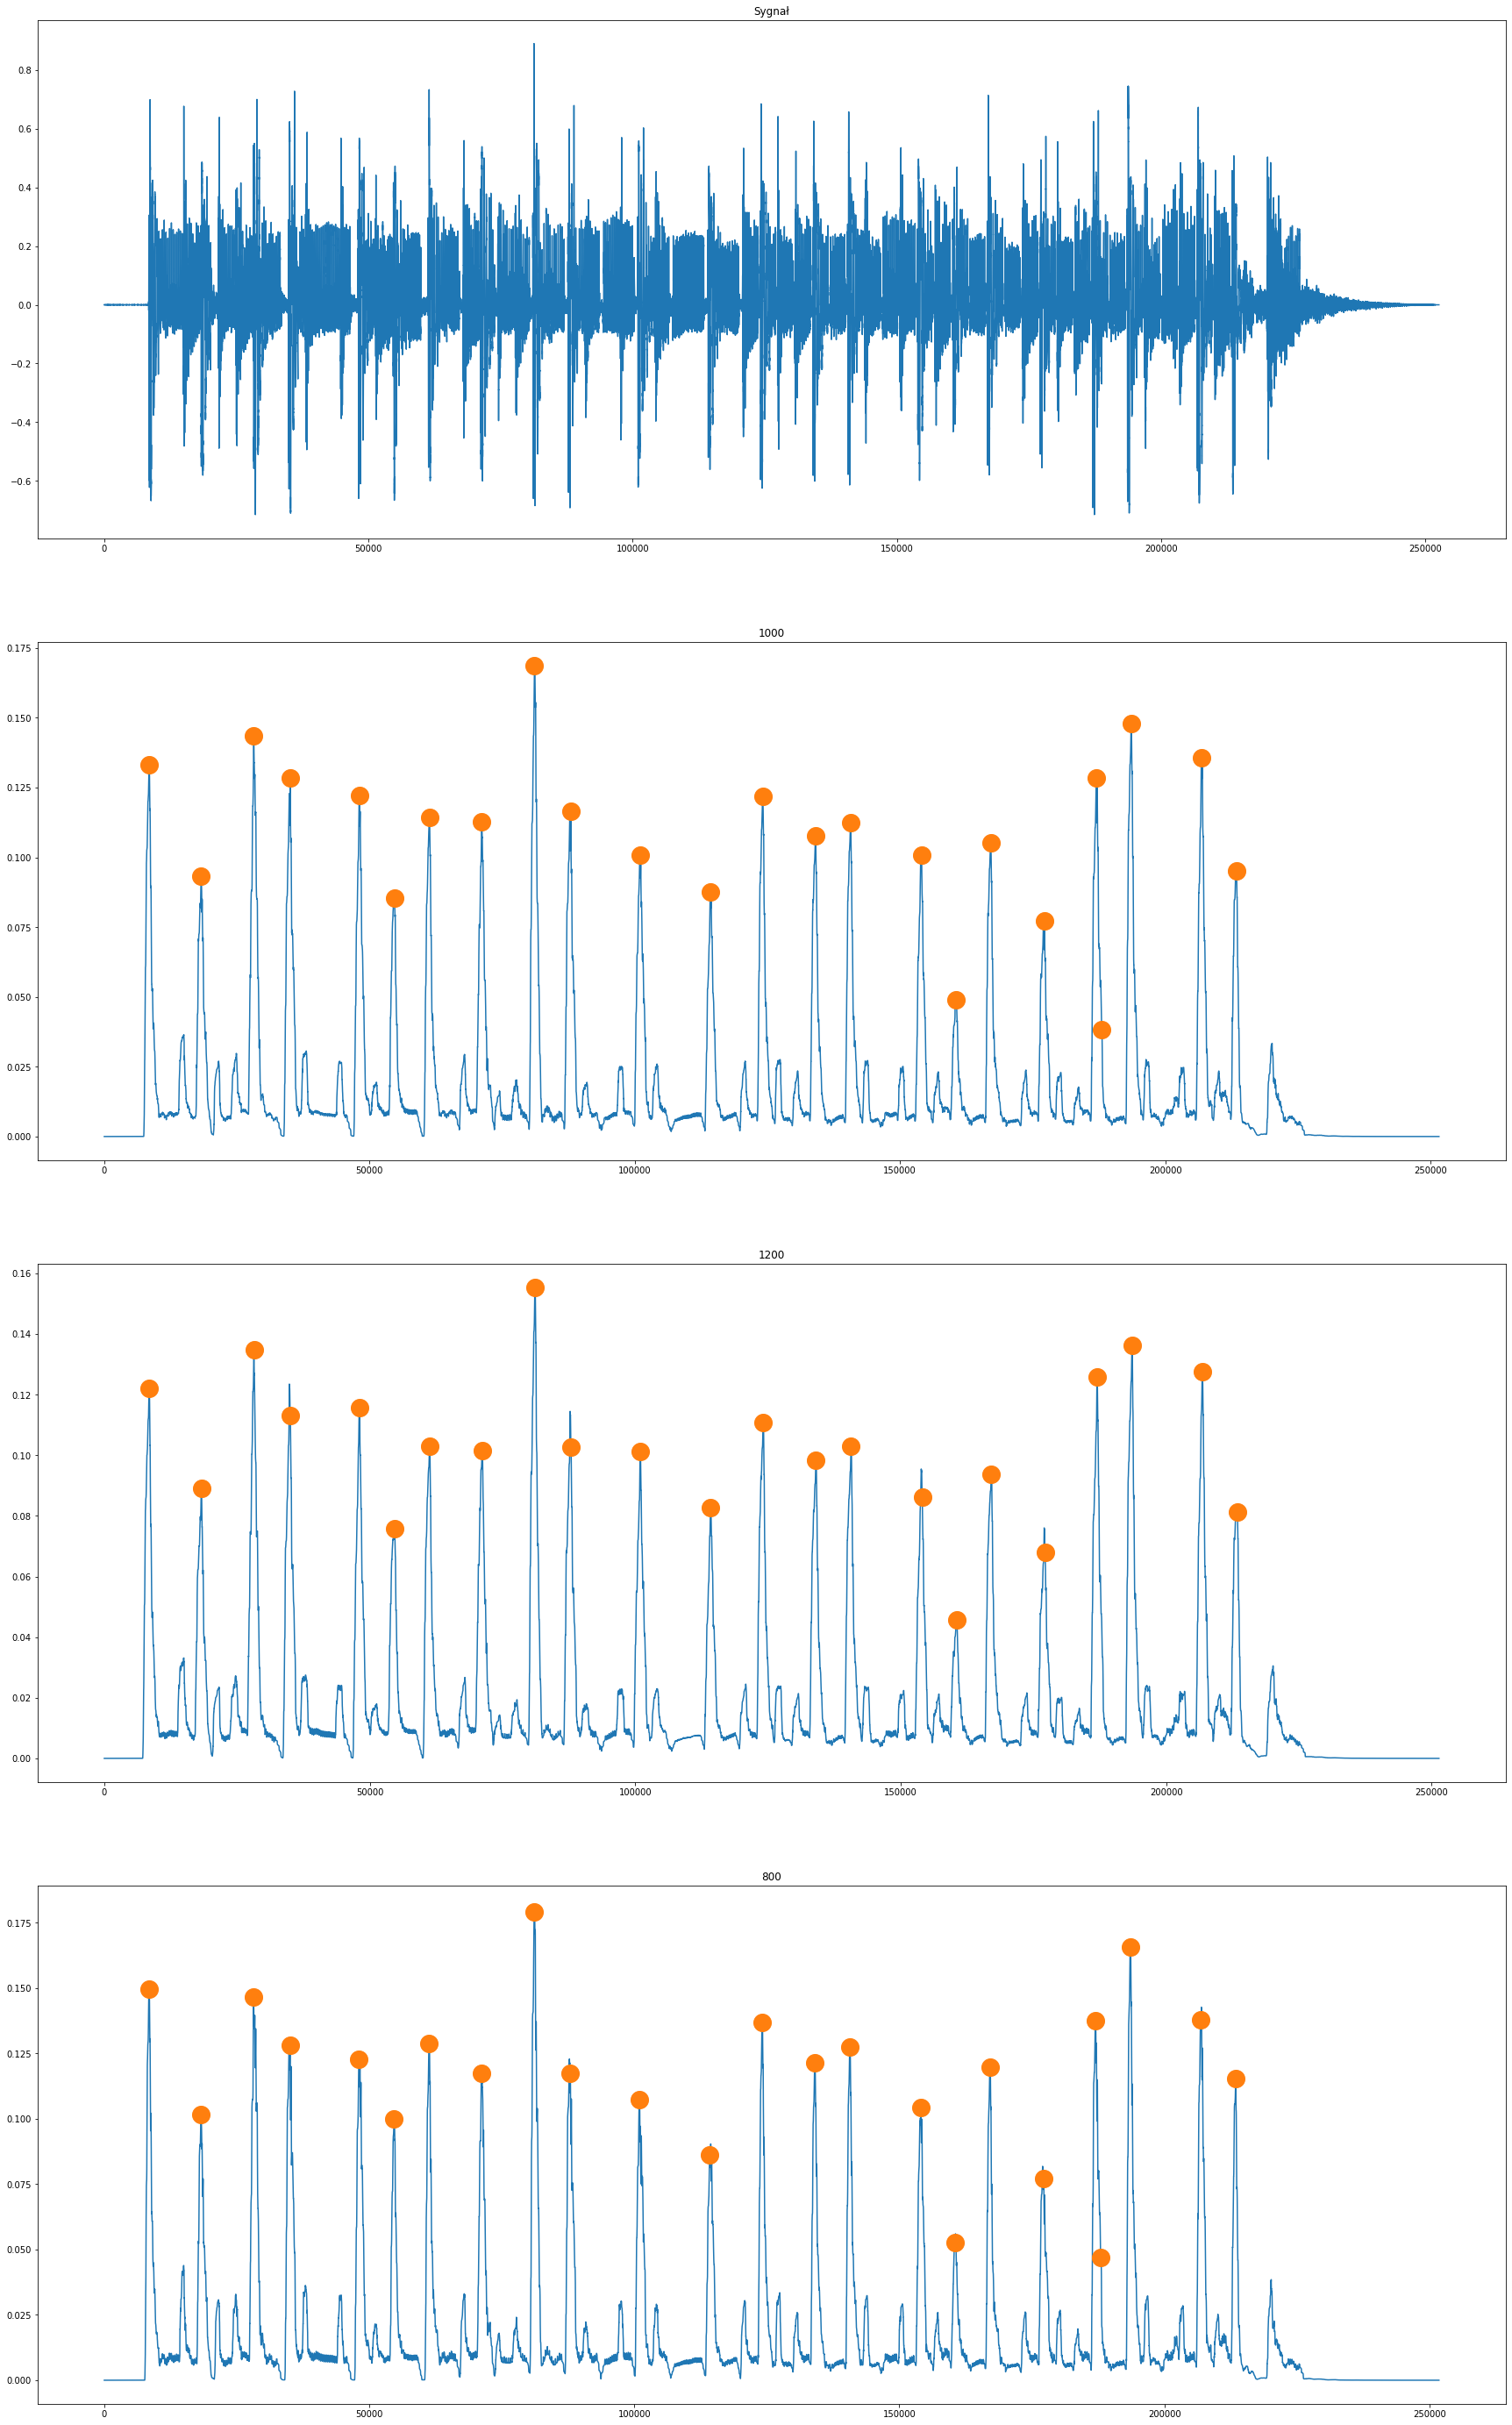

In [17]:
n_samples_0 = 1000
n_samples_1 = int(n_samples_0 + 0.2*n_samples_0)
n_samples_2 = int(n_samples_0 - 0.2*n_samples_0)
envelope_0 = moving_average(y**2, n_samples_0)
envelope_1 = moving_average(y**2, n_samples_1)
envelope_2 = moving_average(y**2, n_samples_2)


peaks_0, _ = find_peaks(envelope_0, distance=1000, height=np.mean(envelope_0)*2)
peaks_1, _ = find_peaks(envelope_0, distance=1000, height=np.mean(envelope_1)*2)
peaks_2, _ = find_peaks(envelope_0, distance=1000, height=np.mean(envelope_2)*2)

fig, axes = plt.subplots(4, 1, figsize=(30, 50))
axes[0].plot(y)
axes[0].set_title("Sygnał")
axes[1].plot(envelope_0)
axes[1].plot(peaks_0, envelope_0[peaks_0], "o", markersize=20)
axes[1].set_title(n_samples_0)
axes[2].plot(envelope_1)
axes[2].plot(peaks_1, envelope_1[peaks_1], "o", markersize=20)
axes[2].set_title(n_samples_1)
axes[3].plot(envelope_2)
axes[3].plot(peaks_2, envelope_2[peaks_2], "o", markersize=20)
axes[3].set_title(n_samples_2)

## Wyznaczenie onsetów z pliku MIDI

Wyznaczałem piki tylko z pierwszego kanału. Przyjmując, że czas wyrażony jest w milisekundach.

In [18]:
import pandas as pd

In [84]:
import csv
times = []
end_track_time = None
with open('./data/Rhythm_3.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        if row[2].strip() == 'Note_on_c' and row[0].strip() == '3':
            times.append(int(row[1].strip()))
        if row[2].strip() == 'End_track' and row[0].strip() == '3':
            end_track_time = int(row[1].strip())
times = np.array(times)

Czasy nie zgadzają się. Sygnał trwa 13 sekund. Czas w plikach midi nie jest wyrażany w milisekundach tylko w inny sposób. Z tego względu nie wykonałem porównania z wykrytymi onsetami.

> Time - Absolute time, in terms of MIDI clocks, at which this event occurs. Meta-events for which time is not meaningful (for example, song title, copyright information, etc.) have an absolute time of 0.

Źródło: https://www.fourmilab.ch/webtools/midicsv/#Download

In [85]:
times

array([   0,  120,  360,  480,  600,  840,  960, 1080, 1320, 1440, 1560,
       1800, 1920, 2040, 2280, 2400, 2520, 2760, 2880, 3000, 3240, 3360,
       3480, 3720])

Drugie podejście polegało na wyznaczenie czasu przy pomocy znajomości czasu końca sygnału midi, przykładowo:

> 4, 4056, End_track

Jednak jak pokazano poniżej takie naiwne podejście nie daje poprawnych rezultatów.

In [91]:
times_relative = (times/end_track_time) * envelope_0.shape[0]
times_relative

array([     0.        ,   7887.3354232 ,  23662.00626959,  31549.34169279,
        39436.67711599,  55211.34796238,  63098.68338558,  70986.01880878,
        86760.68965517,  94648.02507837, 102535.36050157, 118310.03134796,
       126197.36677116, 134084.70219436, 149859.37304075, 157746.70846395,
       165634.04388715, 181408.71473354, 189296.05015674, 197183.38557994,
       212958.05642633, 220845.39184953, 228732.72727273, 244507.39811912])

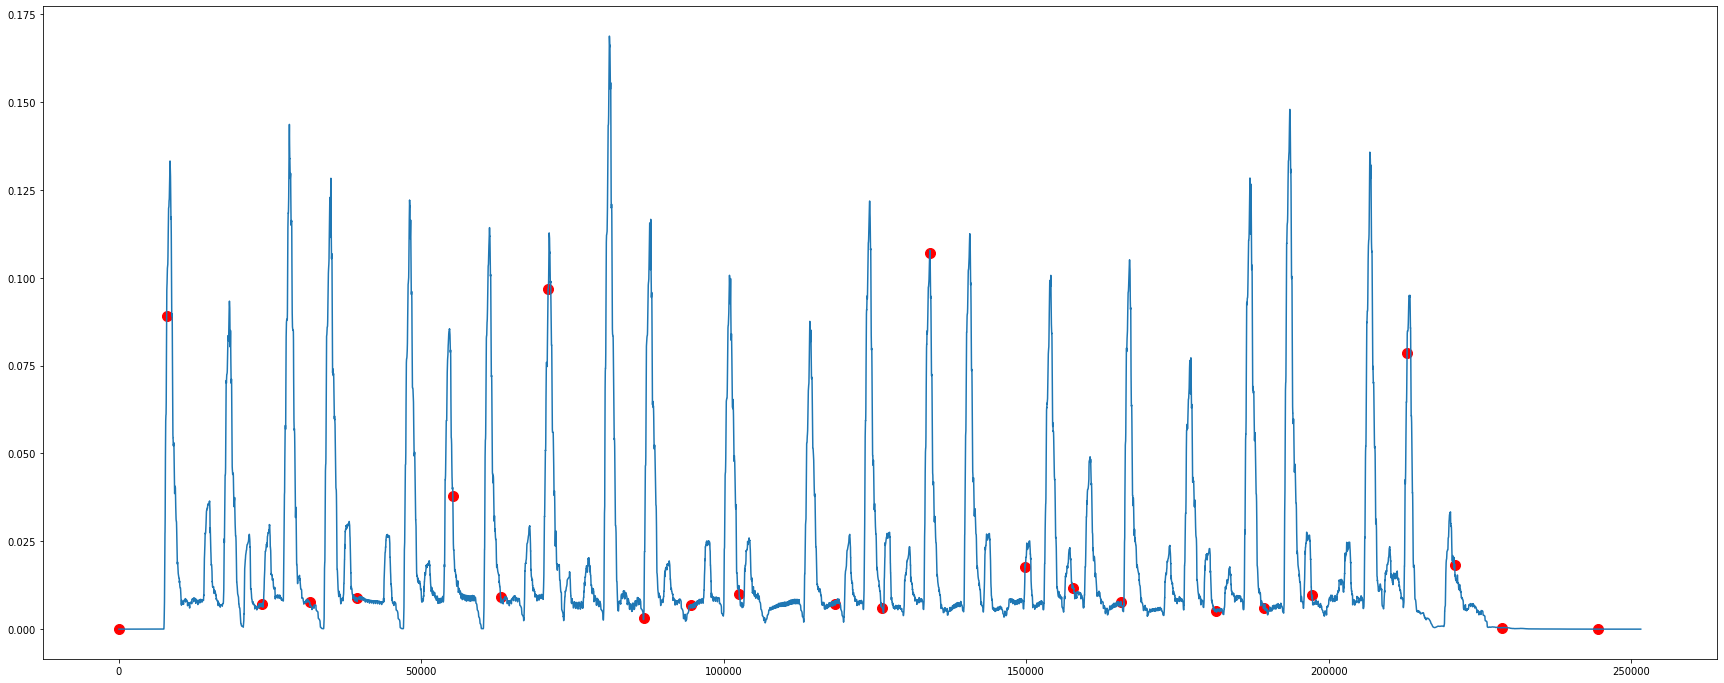

In [92]:
fig = plt.figure(figsize=(30, 12))
plt.plot(envelope_0)
plt.scatter(times_relative.astype(int), envelope_0[times_relative.astype(int)], color='red', s=100)

## Wnioski

Podczas laboratorium wyznaczono onsety za pomocą obwiedni będącej średnią kroczącą sygnału. Nie udało się porównać z wynikami z plików midi z powodu różnic w formatach czasu. Czas w formacie MIDI wyrażany jest w zegarach MIDI.